In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/Harsha/OneDrive/Desktop/stata\El/College_data.csv")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   College_Name    6788 non-null   object
 1   State           6788 non-null   object
 2   Stream          6788 non-null   object
 3   UG_fee          6788 non-null   object
 4   PG_fee          6788 non-null   object
 5   Rating          6788 non-null   object
 6   Academic        6788 non-null   object
 7   Accommodation   6788 non-null   object
 8   Faculty         6788 non-null   object
 9   Infrastructure  6788 non-null   object
 10  Placement       6788 non-null   object
 11  Social_Life     6788 non-null   object
dtypes: object(12)
memory usage: 636.5+ KB


In [20]:
data.tail()

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
6783,Andaman & Nicobar Islands Institute of Medical...,Andaman,Medical,"91,050",--,8.3,8.6,8.4,8.4,8.3,8.2,8.1
6784,"Plastindia International University, Dadra & N...",Dadra,Engineering,--,--,--,--,--,--,--,--,--
6785,SSR Institute of Management and Research,Dadra,Management,"1,30,000",--,8,--,--,8,--,6,--
6786,Institute of Hotel Management and Catering Tec...,Dadra,Hotel-management,"77,000",--,7.7,7,7,8.2,8.5,8,7.4
6787,"Government Polytechnic, Daman",Daman,Engineering,"3,575","8,280",--,--,--,--,--,--,--


In [21]:
data.shape

(6788, 12)

In [22]:
data.describe()

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
count,6788,6788,6788,6788,6788,6788,6788,6788,6788,6788,6788,6788
unique,3120,35,10,2367,1572,66,54,72,54,64,74,65
top,National Institute of Technology,Maharashtra,Arts,--,--,--,--,--,--,--,--,--
freq,64,298,837,1170,3311,732,846,889,907,916,890,954


In [23]:
data.nunique()

College_Name      3120
State               35
Stream              10
UG_fee            2367
PG_fee            1572
Rating              66
Academic            54
Accommodation       72
Faculty             54
Infrastructure      64
Placement           74
Social_Life         65
dtype: int64

In [24]:
data['Stream'].unique()

array(['Engineering', 'Management', 'Science', 'Commerce', 'Arts',
       'Hotel-management', 'Agriculture', 'Medical', 'Pharmacy', 'Law'],
      dtype=object)

In [25]:
columns = ['UG_fee', 'PG_fee', 'Rating', 'Academic', 'Accommodation', 'Faculty', 'Infrastructure', 'Placement', 'Social_Life']
for col in columns:
    data[col] = data[col].replace("--","0")

In [26]:
count_universities = data.groupby('State')['College_Name'].nunique()
print(count_universities)

State
Andaman                5
Andhra pradesh       183
Arunachal pradesh     30
Assam                112
Bihar                126
Chandigarh            70
Chhattisgarh         100
Dadra                  3
Daman                  1
Delhi ncr            166
Goa                   47
Gujarat              144
Haryana              113
Himachal pradesh      88
Jammu                 80
Jharkhand             86
Karnataka            187
Kerala               204
Madhya pradesh       112
Maharashtra          196
Manipur               24
Meghalaya             31
Mizoram               18
Nagaland              36
Orissa               149
Puducherry            54
Punjab               122
Rajasthan             84
Sikkim                18
Tamil nadu           172
Telangana            182
Tripura               24
Uttar pradesh        159
Uttarakhand          116
West bengal          169
Name: College_Name, dtype: int64


In [27]:
stream_counts = data['Stream'].value_counts()
print(stream_counts)


Stream
Arts                837
Science             825
Commerce            756
Management          747
Engineering         732
Medical             669
Law                 569
Pharmacy            567
Hotel-management    544
Agriculture         542
Name: count, dtype: int64


C:\Users\Harsha\AppData\Local\Temp\ipykernel_16296\3695550106.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Blues', 10)


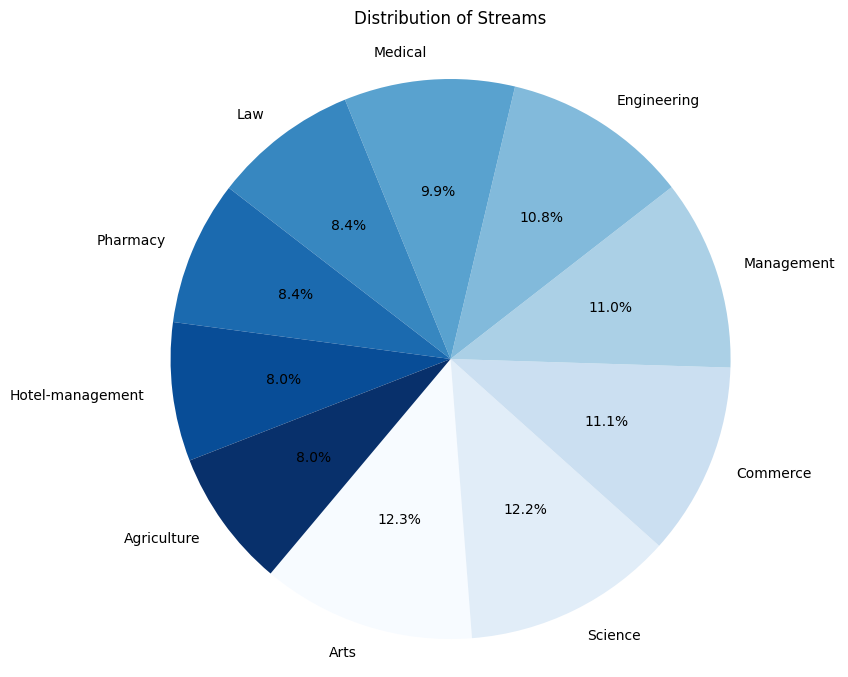

In [28]:

stream_counts = data['Stream'].value_counts(normalize=True)
labels = stream_counts.index
sizes = stream_counts.values

colors = plt.cm.get_cmap('Blues', 10)
colors = colors(np.linspace(0, 1, len(labels)))

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=230, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Streams', pad=20)
plt.show()


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   College_Name    6788 non-null   object
 1   State           6788 non-null   object
 2   Stream          6788 non-null   object
 3   UG_fee          6788 non-null   object
 4   PG_fee          6788 non-null   object
 5   Rating          6788 non-null   object
 6   Academic        6788 non-null   object
 7   Accommodation   6788 non-null   object
 8   Faculty         6788 non-null   object
 9   Infrastructure  6788 non-null   object
 10  Placement       6788 non-null   object
 11  Social_Life     6788 non-null   object
dtypes: object(12)
memory usage: 636.5+ KB


In [30]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Academic'] = pd.to_numeric(data['Academic'], errors='coerce')
data['Accommodation'] = pd.to_numeric(data['Accommodation'], errors='coerce')
data['Faculty'] = pd.to_numeric(data['Faculty'], errors='coerce')
data['Infrastructure'] = pd.to_numeric(data['Infrastructure'], errors='coerce')
data['Placement'] = pd.to_numeric(data['Placement'], errors='coerce')
data['Social_Life'] = pd.to_numeric(data['Social_Life'], errors='coerce')
summary_statistics = data.describe()
print(summary_statistics)

            Rating     Academic  Accommodation      Faculty  Infrastructure   
count  6788.000000  6788.000000    6788.000000  6788.000000     6788.000000  \
mean      6.967693     7.127622       6.321700     7.037949        6.887669   
std       2.535727     2.775804       2.644451     2.846410        2.843728   
min       0.000000     0.000000       0.000000     0.000000        0.000000   
25%       7.100000     7.500000       6.300000     7.400000        7.000000   
50%       7.800000     8.100000       7.300000     8.100000        7.900000   
75%       8.300000     8.600000       7.900000     8.500000        8.500000   
max      10.000000     9.800000       9.800000     9.900000        9.900000   

         Placement  Social_Life  
count  6788.000000  6788.000000  
mean      6.286211     6.822555  
std       2.710605     2.879785  
min       0.000000     0.000000  
25%       6.000000     7.000000  
50%       7.200000     8.000000  
75%       8.000000     8.400000  
max       9.9000

In [31]:
df = data
df_without_duplicates = df.drop_duplicates(subset=['College_Name', 'State', 'Stream'])
df_without_duplicates.shape
# Filter the DataFrame to exclude Dadra and Nagar Haveli and Daman and Diu
data = data[data['State'] !='Daman']

data = data[data['State'] !='Dadra']

# Print the filtered data
print(data)


                                           College_Name       State   
0                Indian Institute of Technology Madras   Tamil nadu  \
1              College of Engineering, Anna University   Tamil nadu   
2                          NIT Trichy, Tiruchirappalli   Tamil nadu   
3                      Vellore Institute of Technology   Tamil nadu   
4                 SRM Engineering College, Kanchipuram   Tamil nadu   
...                                                 ...         ...   
6779     Mahatma Gandhi Government College, Mayabander      Andaman   
6780  Tagore Government College of Education, Port B...     Andaman   
6781  Dr. B R Ambedkar Institute of Technology, Port...     Andaman   
6782           Jawaharlal Nehru Rajkeeya Mahavidyalaya      Andaman   
6783  Andaman & Nicobar Islands Institute of Medical...     Andaman   

                Stream    UG_fee    PG_fee  Rating  Academic  Accommodation   
0          Engineering    75,116    23,070     8.7       9.0        

C:\Users\Harsha\AppData\Local\Temp\ipykernel_16296\4162651883.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_social_life_by_state_filtered.index, y=average_social_life_by_state_filtered.values, palette=color_palette_filtered)


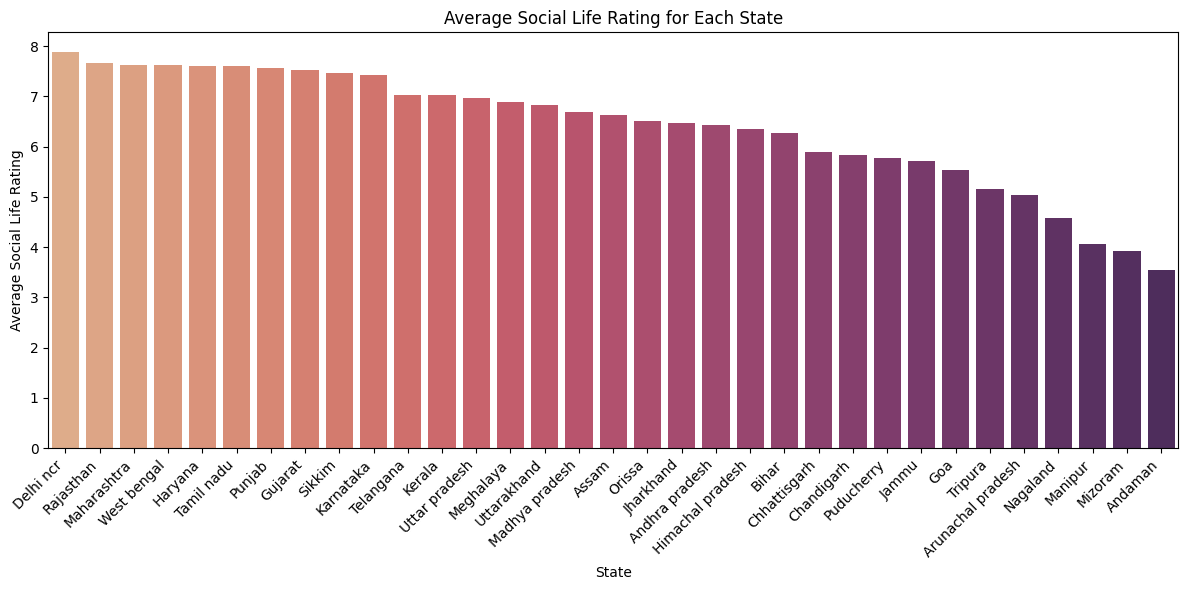

The state with the best social life in universities is Delhi ncr with an average rating of 7.88


In [32]:
# Filter the data to exclude Dadra and Nagar Haveli and Daman and Diu
filtered_data = data[data['State'] != 'Dadra and Nagar Haveli and Daman and Diu']

# Calculate the average social life rating by state excluding Dadra and Nagar Haveli and Daman and Diu
average_social_life_by_state_filtered = filtered_data.groupby('State')['Social_Life'].mean().sort_values(ascending=False)

# Set the color palette
color_palette_filtered = sns.color_palette('flare', len(average_social_life_by_state_filtered))

# Plot the bar plot with the filtered data
plt.figure(figsize=(12, 6))
sns.barplot(x=average_social_life_by_state_filtered.index, y=average_social_life_by_state_filtered.values, palette=color_palette_filtered)
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Average Social Life Rating')
plt.title('Average Social Life Rating for Each State')
plt.tight_layout()
plt.show()

# Calculate the state with the best social life rating and its value
best_social_life_state_filtered = average_social_life_by_state_filtered.idxmax()
best_social_life_rating_filtered = average_social_life_by_state_filtered.max()

print(f"The state with the best social life in universities is {best_social_life_state_filtered} with an average rating of {best_social_life_rating_filtered:.2f}")


In [33]:
P = {state: (score / 10) * 100 for state, score in average_social_life_by_state.items()}
for state, percentage in P.items():
    print(f"{state}: {percentage:.2f}%")

NameError: name 'average_social_life_by_state' is not defined

In [ ]:
average_social_life_by_state = data.groupby('State')['Academic'].mean().sort_values(ascending=False)
best_social_life_state = average_social_life_by_state.idxmax()
best_social_life_rating = average_social_life_by_state.max()

color_palette = sns.color_palette('flare', len(average_social_life_by_state))

plt.figure(figsize=(12, 6))
sns.barplot(x=average_social_life_by_state.index, y=average_by_state.values, palette=color_palette)
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Average Social Life Rating')
plt.title('Average Social Life Rating for Each State')
plt.tight_layout()
plt.show()

print(f"The state with the best social life in universities is {best_social_life_state} with an average rating of {best_social_life_rating:.2f}")

NameError: name 'average_by_state' is not defined

<Figure size 1200x600 with 0 Axes>

                Placement  Academic   Faculty  Infrastructure
Placement        1.000000  0.873838  0.898564        0.915242
Academic         0.873838  1.000000  0.906706        0.931224
Faculty          0.898564  0.906706  1.000000        0.912638
Infrastructure   0.915242  0.931224  0.912638        1.000000


<Axes: >

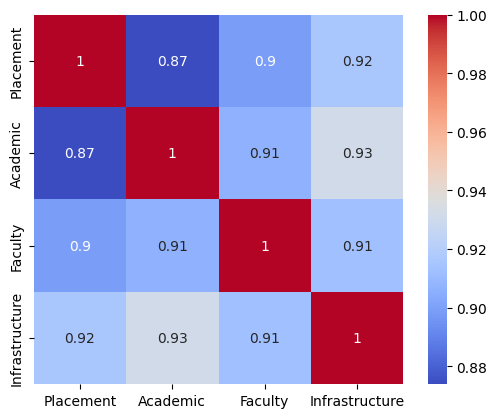

In [ ]:
selected_columns = ['Placement', 'Academic']
correlation_matrix = data[['Placement', 'Academic','Faculty',	'Infrastructure']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

In [ ]:

# Calculate average ratings for each state and sort in linear order
state_avg_ratings = data.groupby('State')[['Rating', 'Academic', 'Faculty', 'Infrastructure', 'Placement']].mean().\
    sort_values(by=['Rating', 'Academic', 'Faculty', 'Infrastructure', 'Placement'], ascending=False)

# Print the sorted average ratings
print(state_avg_ratings)

                     Rating  Academic   Faculty  Infrastructure  Placement
State                                                                     
Tamil nadu         7.854545  8.032660  7.798653        7.842088   7.408418
Delhi ncr          7.824490  8.026190  8.020748        7.892177   7.253061
Maharashtra        7.768792  7.887248  7.833893        7.656040   7.187584
Rajasthan          7.746209  7.647653  7.747653        7.690975   6.996390
West bengal        7.575510  8.017347  7.946599        7.531633   6.986395
Haryana            7.571174  7.635231  7.629893        7.675801   7.061210
Gujarat            7.540426  7.722695  7.840426        7.515248   6.914894
Punjab             7.517794  7.626690  7.603203        7.491815   6.916014
Karnataka          7.515306  7.740816  7.794898        7.527551   7.078231
Sikkim             7.441818  7.630909  7.825455        7.354545   7.256364
Telangana          7.324014  7.355197  7.224373        7.102867   6.819713
Kerala             7.2367

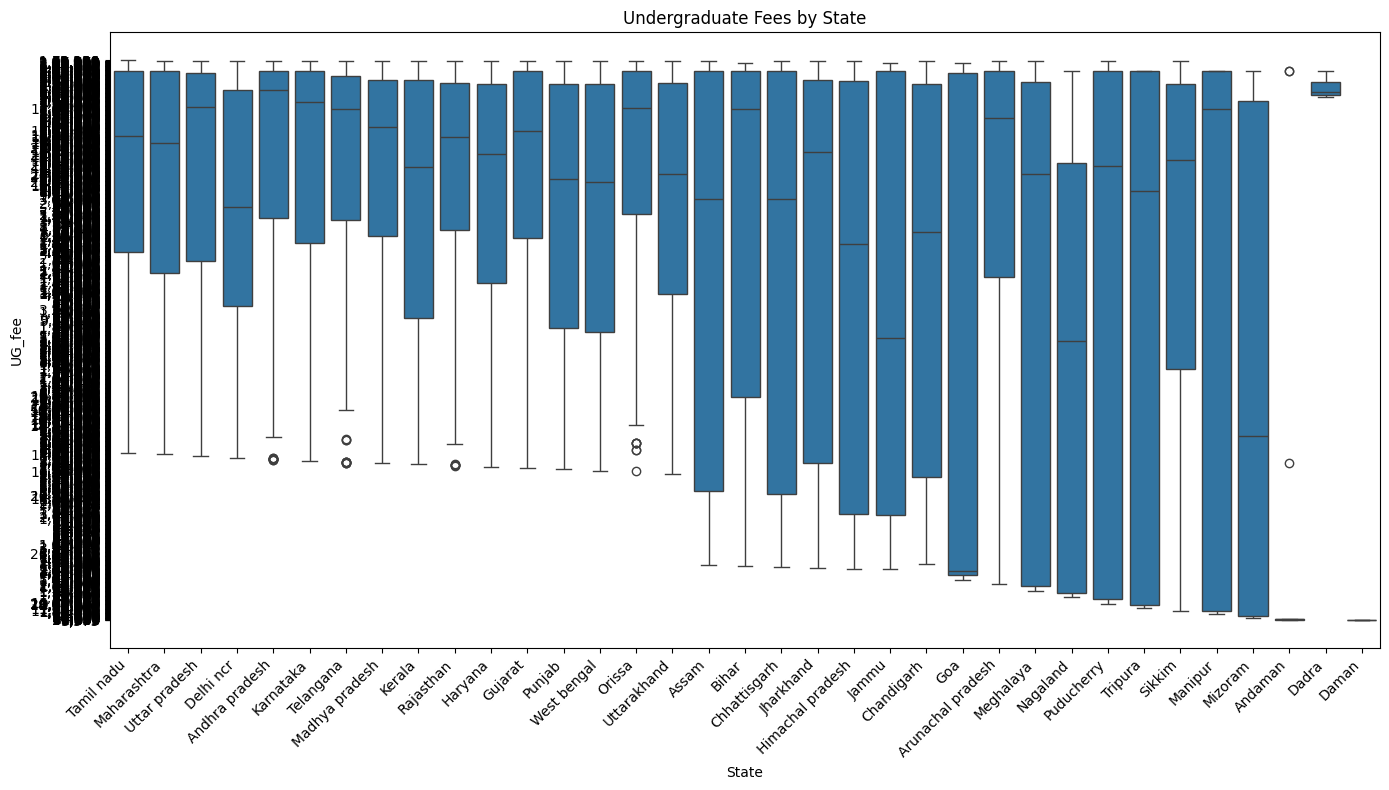

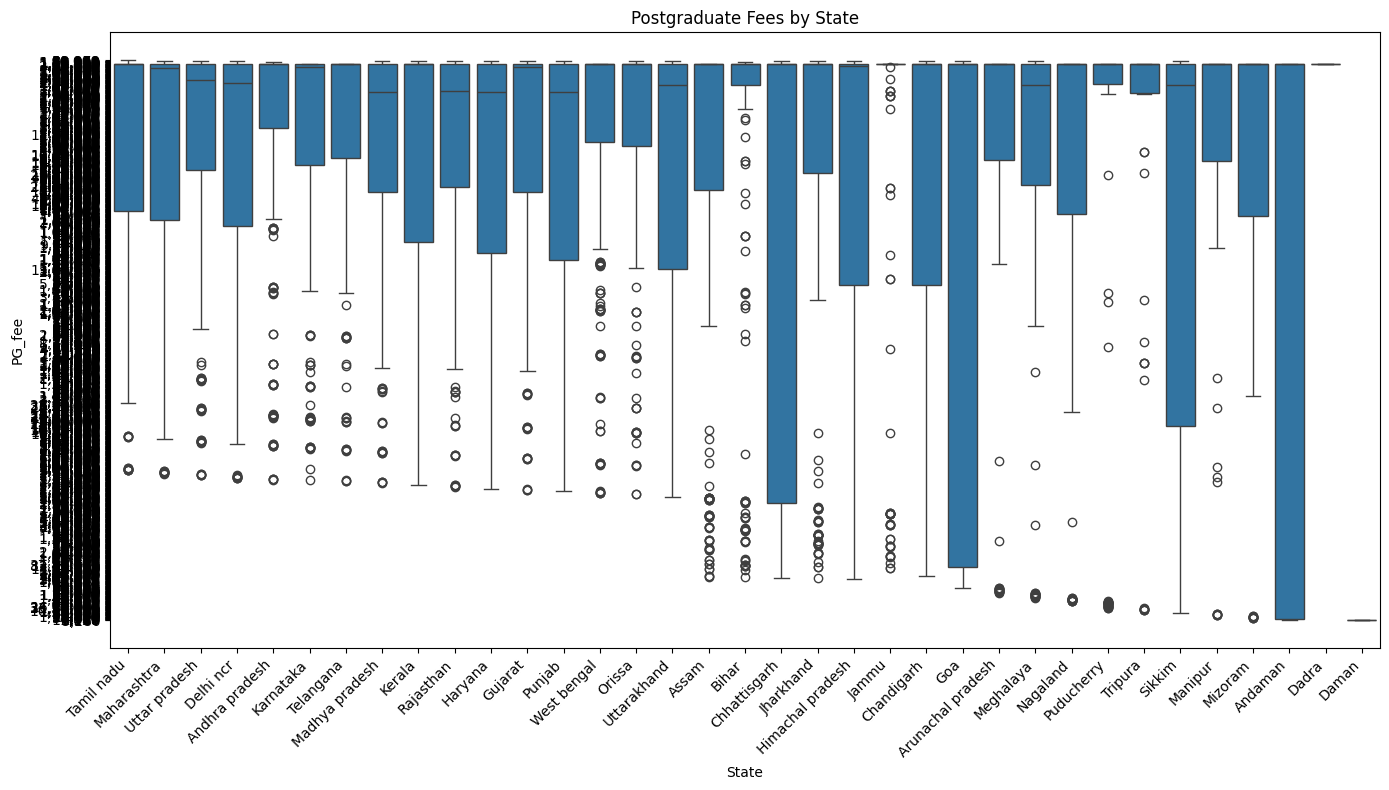

In [ ]:
plt.figure(figsize=(14, 8))

# Create boxplot of UG_fee by State
sns.boxplot(x='State', y='UG_fee', data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right
plt.title('Undergraduate Fees by State')
plt.tight_layout()  # Adjust plot to prevent overlapping
plt.show()

# Set the figure size
plt.figure(figsize=(14, 8))

# Create boxplot of PG_fee by State
sns.boxplot(x='State', y='PG_fee', data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right
plt.title('Postgraduate Fees by State')
plt.tight_layout()  # Adjust plot to prevent overlapping
plt.show()

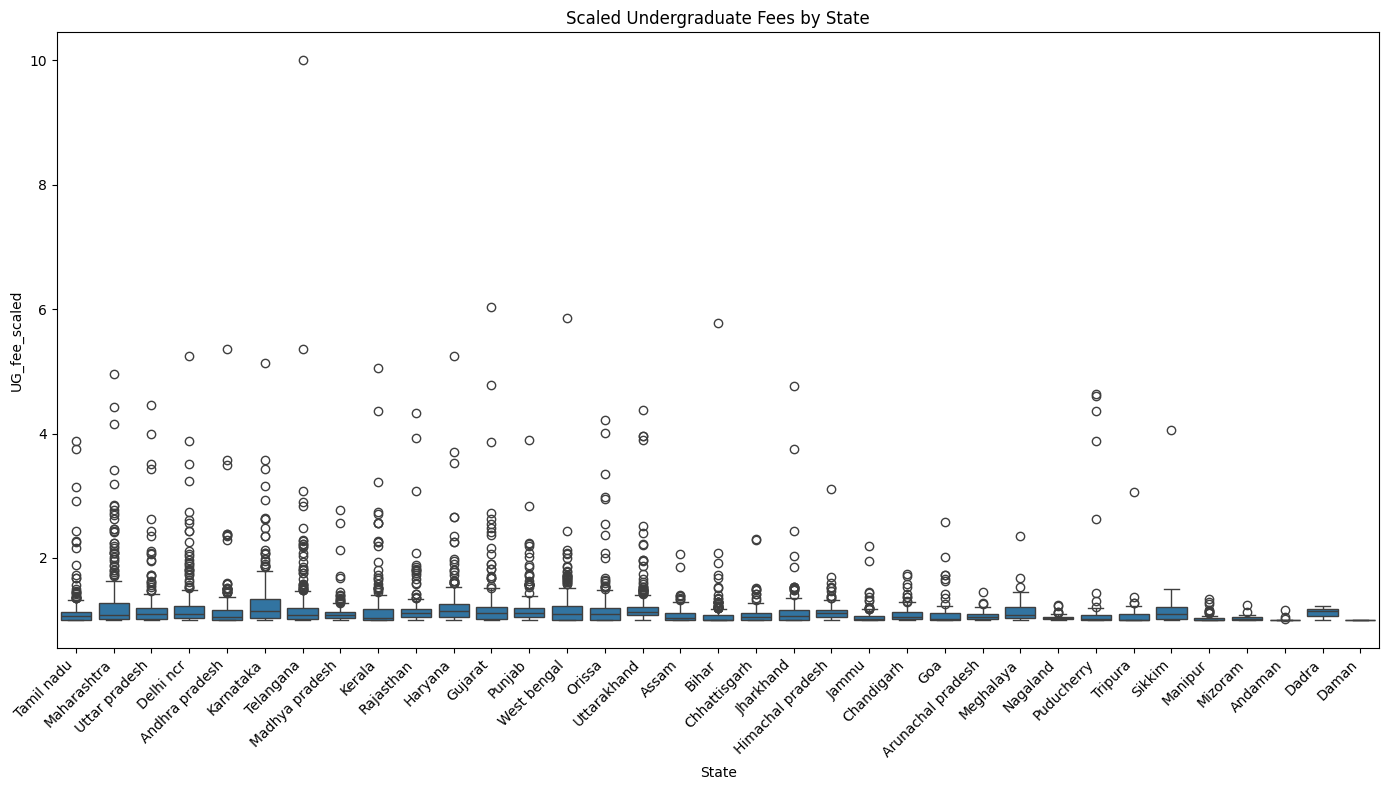

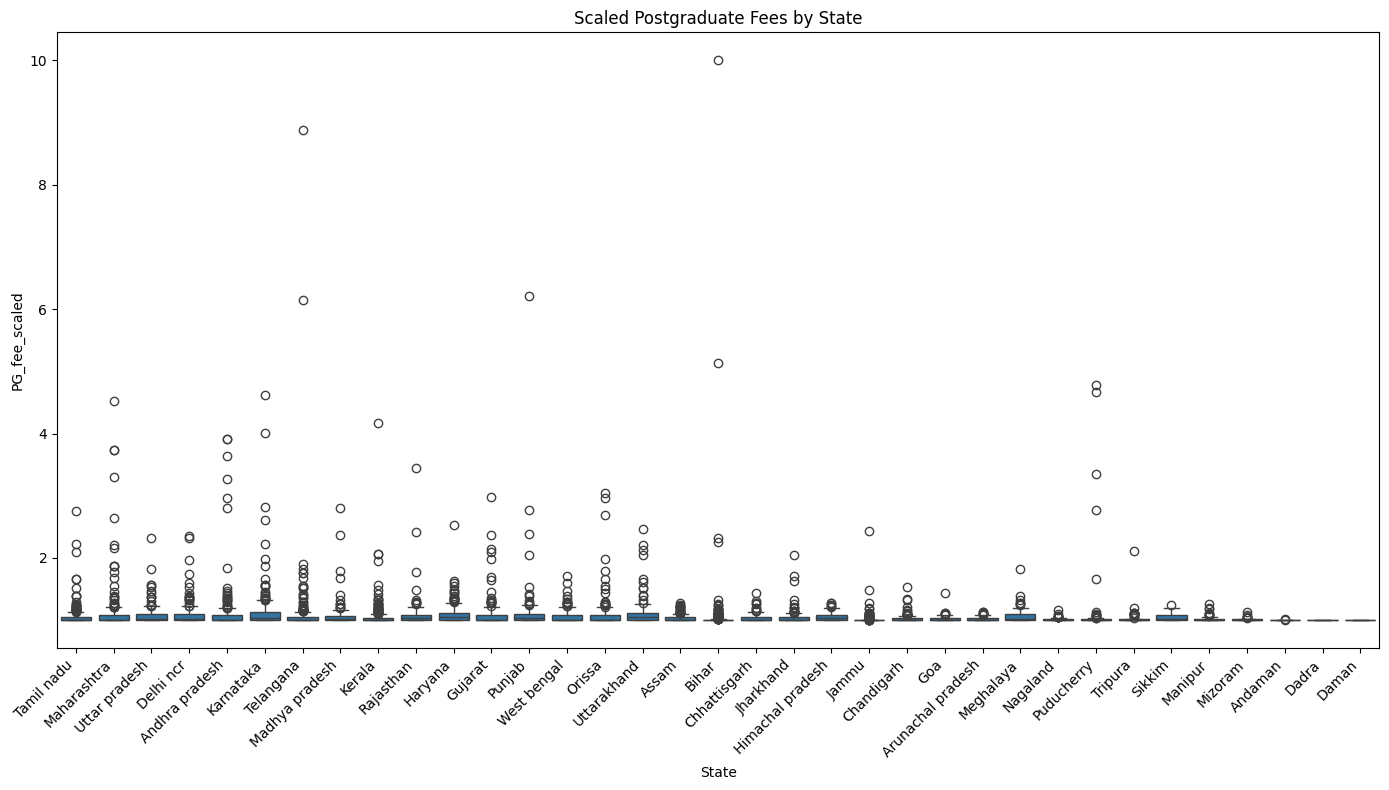

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert UG_fee and PG_fee to float
data['UG_fee'] = data['UG_fee'].astype(float)
data['PG_fee'] = data['PG_fee'].astype(float)

# Scale UG_fee and PG_fee from 1 to 10
scaler = MinMaxScaler(feature_range=(1, 10))
data[['UG_fee_scaled', 'PG_fee_scaled']] = scaler.fit_transform(data[['UG_fee', 'PG_fee']])

# Set the figure size
plt.figure(figsize=(14, 8))

# Create boxplot of UG_fee_scaled by State
sns.boxplot(x='State', y='UG_fee_scaled', data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right
plt.title('Scaled Undergraduate Fees by State')
plt.tight_layout()  # Adjust plot to prevent overlapping
plt.show()

# Set the figure size
plt.figure(figsize=(14, 8))

# Create boxplot of PG_fee_scaled by State
sns.boxplot(x='State', y='PG_fee_scaled', data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right
plt.title('Scaled Postgraduate Fees by State')
plt.tight_layout()  # Adjust plot to prevent overlapping
plt.show()


Text(0.5, 1.0, 'Undergraduate Fees by State')

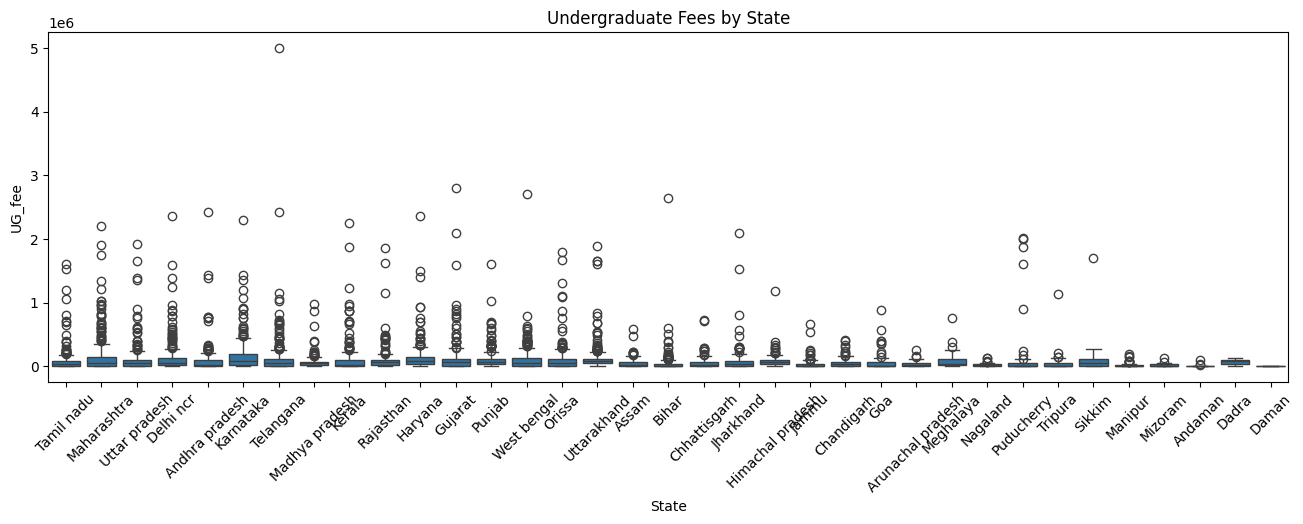

In [ ]:
plt.figure(figsize=(16, 10))

# Create a boxplot of UG_fee and PG_fee by State
plt.subplot(2, 1, 1)
sns.boxplot(x='State', y='UG_fee', data=data)
plt.xticks(rotation=45)
plt.title('Undergraduate Fees by State')

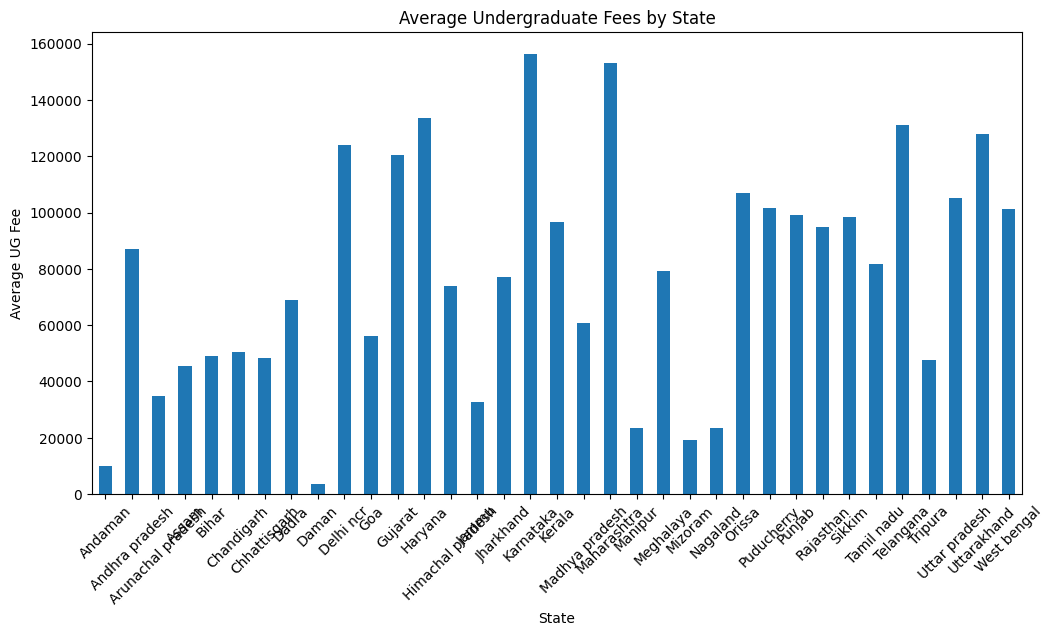

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('State')['UG_fee'].mean().plot(kind='bar')
plt.title('Average Undergraduate Fees by State')
plt.xlabel('State')
plt.ylabel('Average UG Fee')
plt.xticks(rotation=45)
plt.show()


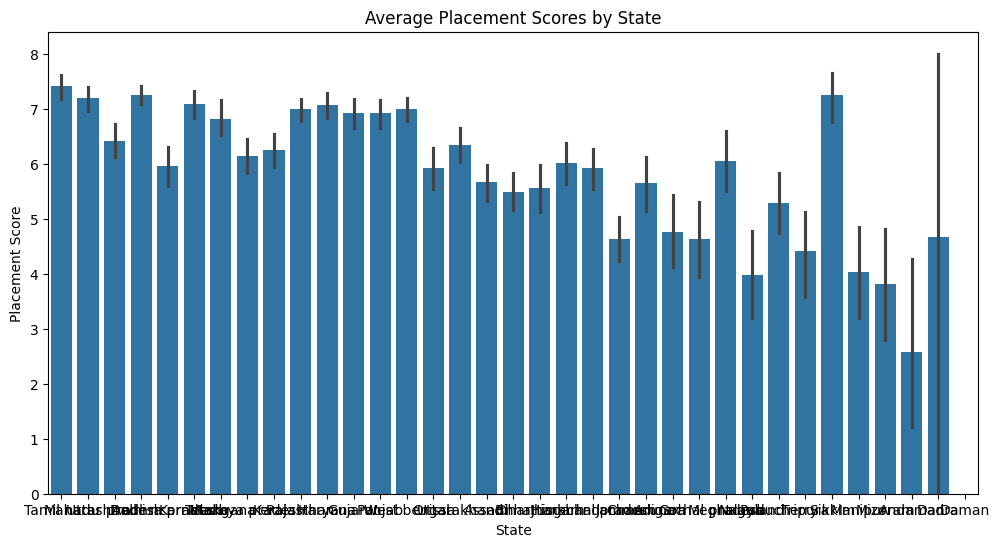

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Placement', data=data)
plt.title('Average Placement Scores by State')
plt.xlabel('State')
plt.ylabel('Placement Score')
plt.show()


In [ ]:
engineering_data = data[data['Stream'] == 'Engineering']
engineering_data['Average_Score'] = engineering_data[['Rating', 'Academic', 'Accommodation', 'Faculty', 'Infrastructure', 'Placement', 'Social_Life']].mean(axis=1)

top_engineering_colleges = engineering_data[['College_Name', 'Average_Score']].sort_values(by='Average_Score', ascending=False).head(5)

print(top_engineering_colleges)


                                       College_Name  Average_Score
330                  P.P. Savani University, Surat        9.257143
221                    Avantika University, Ujjain        9.057143
187      Birla Institute of Technology and Science        9.014286
4655                      Netaji Subhas University        9.000000
33    National Institute of Industrial Engineering        8.985714


C:\Users\Harsha\AppData\Local\Temp\ipykernel_16848\890496302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineering_data['Average_Score'] = engineering_data[['Rating', 'Academic', 'Accommodation', 'Faculty', 'Infrastructure', 'Placement', 'Social_Life']].mean(axis=1)


In [ ]:
engineering_data['Average_Academic'] = engineering_data['Academic']
engineering_data['Average_Faculty'] = engineering_data['Faculty']
engineering_data['Average_Infrastructure'] = engineering_data['Infrastructure']
engineering_data['Average_Placement'] = engineering_data['Placement']
engineering_data['Average_Score'] = engineering_data[['Average_Academic', 'Average_Faculty', 'Average_Infrastructure', 'Average_Placement']].mean(axis=1)
top_colleges = engineering_data[['College_Name', 'Average_Score']].sort_values(by='Average_Score', ascending=False).head(5)
print(top_colleges)

                                      College_Name  Average_Score
330                 P.P. Savani University, Surat           9.300
167                   Indian Institute of Science           9.225
221                   Avantika University, Ujjain           9.150
187     Birla Institute of Technology and Science           9.075
33   National Institute of Industrial Engineering           9.075


C:\Users\Harsha\AppData\Local\Temp\ipykernel_16848\2774390100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineering_data['Average_Academic'] = engineering_data['Academic']
C:\Users\Harsha\AppData\Local\Temp\ipykernel_16848\2774390100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineering_data['Average_Faculty'] = engineering_data['Faculty']
C:\Users\Harsha\AppData\Local\Temp\ipykernel_16848\2774390100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

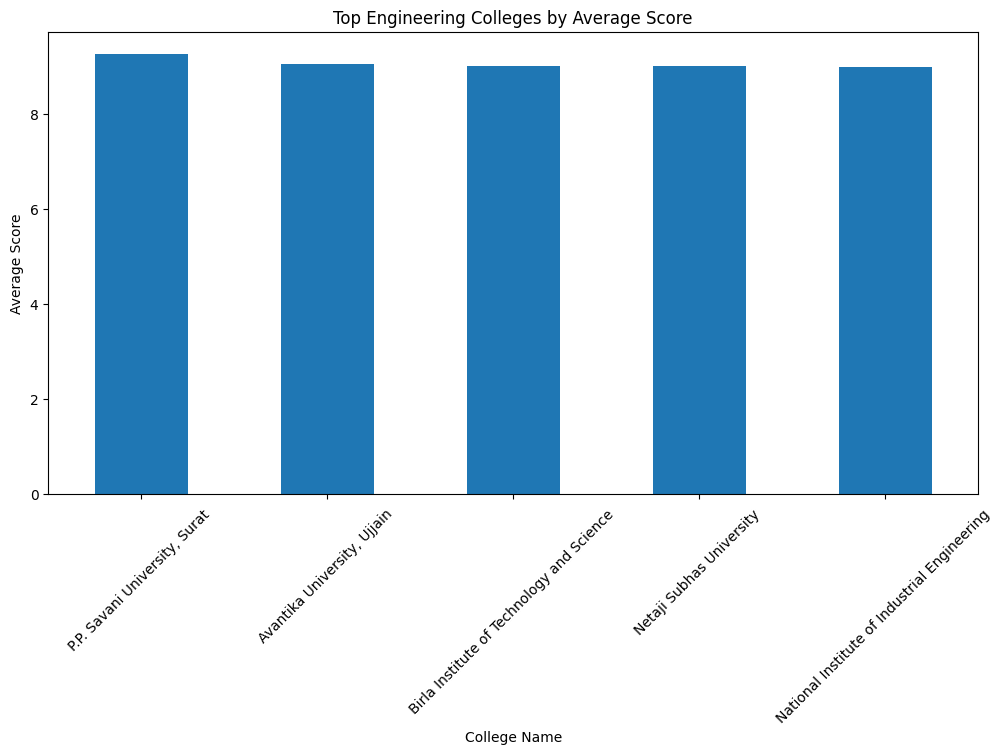

In [ ]:
top_engineering_colleges.plot(x='College_Name', y='Average_Score', kind='bar', figsize=(12, 6), legend=False)
plt.xlabel('College Name')
plt.ylabel('Average Score')
plt.title('Top Engineering Colleges by Average Score')
plt.xticks(rotation=45)
plt.show()


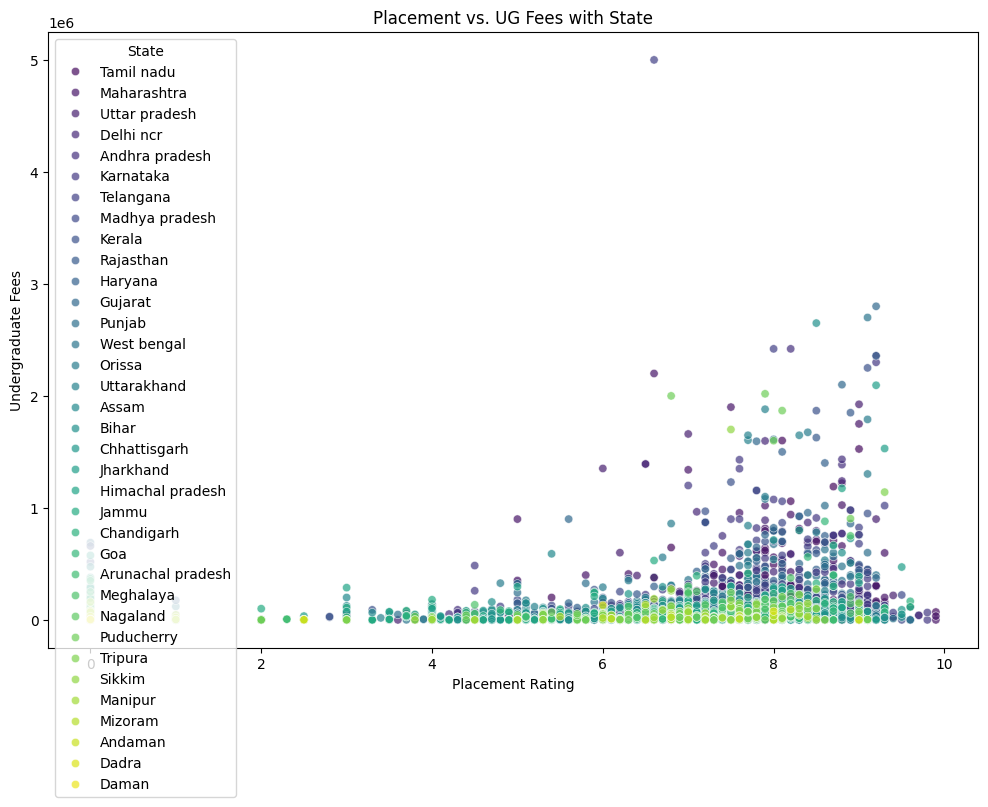

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Placement', y='UG_fee', data=data, hue='State', palette='viridis', alpha=0.7)
plt.xlabel('Placement Rating')
plt.ylabel('Undergraduate Fees')
plt.title('Placement vs. UG Fees with State')
plt.legend(title='State', loc='upper left')
plt.show()


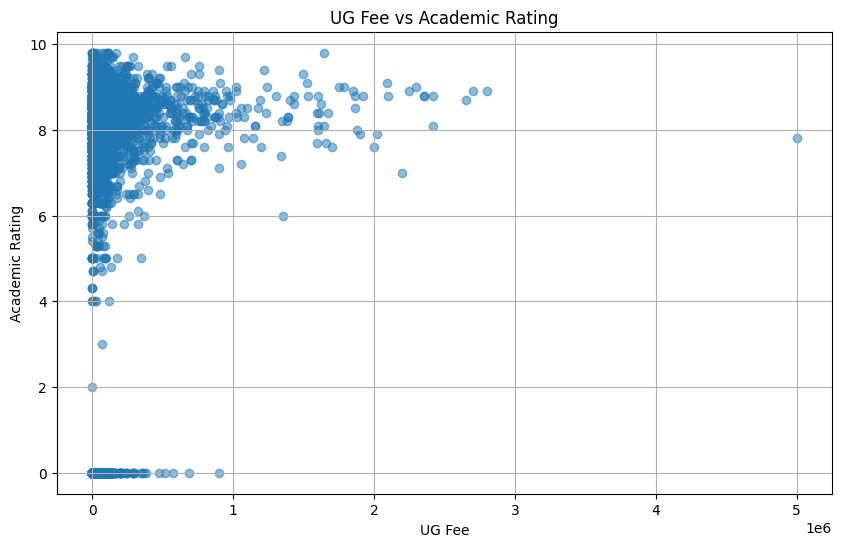

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['UG_fee'], data['Academic'], alpha=0.5)
plt.title('UG Fee vs Academic Rating')
plt.xlabel('UG Fee')
plt.ylabel('Academic Rating')
plt.grid(True)
plt.show()


In [ ]:
academic_weight = 0.4
placement_weight = 0.6
data['ROI_score'] = (data['Academic'] * academic_weight + data['Placement'] * placement_weight)
top_ROI_university = data.sort_values(by='ROI_score', ascending=False).head(1)
print(top_ROI_university[['College_Name', 'ROI_score']])

                      College_Name  ROI_score
948  Armed Forces Medical College         9.7


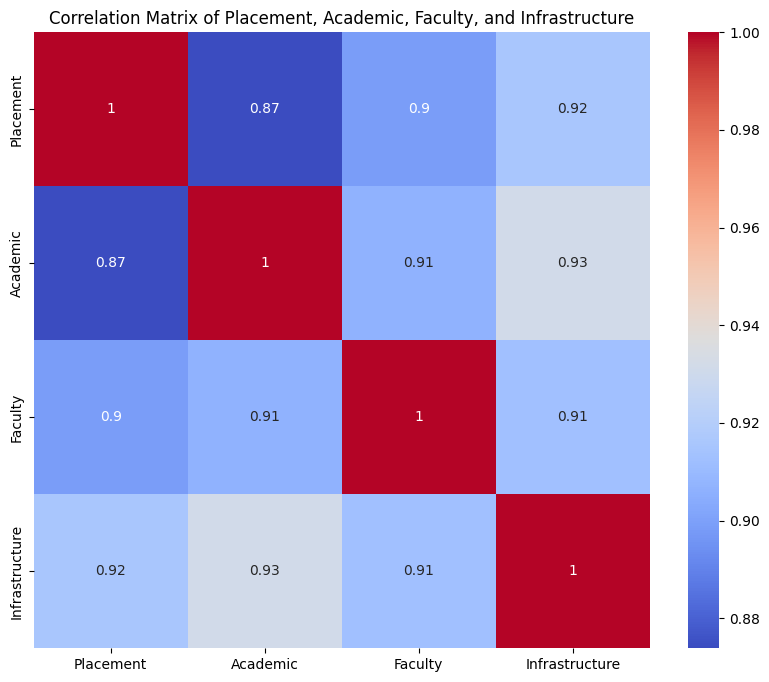

In [ ]:
selected_columns = ['Placement', 'Academic']
correlation_matrix = data[['Placement', 'Academic', 'Faculty', 'Infrastructure']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Placement, Academic, Faculty, and Infrastructure')
plt.show()


In [ ]:
average_roi_by_stream = data.groupby('Stream')['ROI_score'].mean()
best_stream = average_roi_by_stream.idxmax()
best_stream_average_roi = average_roi_by_stream.max()
print(f"The stream with the highest average ROI is: {best_stream} with an average ROI score of {best_stream_average_roi:.2f}")

The stream with the highest average ROI is: Management with an average ROI score of 7.17


In [ ]:
stream_avg_scores = data.groupby('Stream')[['Academic', 'Placement']].mean()
academic_weight = 0.4
placement_weight = 0.6
stream_avg_scores['Overall_Score'] = (stream_avg_scores['Academic'] * academic_weight +
                                      stream_avg_scores['Placement'] * placement_weight)
print(stream_avg_scores)
best_stream = stream_avg_scores.sort_values(by='Overall_Score', ascending=False).head(1)
print(best_stream)


                  Academic  Placement  Overall_Score
Stream                                              
Agriculture       6.882841   5.997048       6.351365
Arts              6.952927   5.854361       6.293787
Commerce          7.233730   6.109127       6.558968
Engineering       7.331011   6.700410       6.952650
Hotel-management  6.344853   5.814890       6.026875
Law               7.101054   6.118629       6.511599
Management        7.531191   6.935207       7.173601
Medical           7.132735   6.410912       6.699641
Pharmacy          7.005467   6.205644       6.525573
Science           7.436848   6.502061       6.875976
            Academic  Placement  Overall_Score
Stream                                        
Management  7.531191   6.935207       7.173601


In [34]:
from tabulate import tabulate

# Filter the data for colleges in Karnataka and engineering stream
karnataka_data = data[(data['State'] == 'Karnataka') & (data['Stream'] == 'Engineering')]

# Exclude the college "Kasturba Medical College"
karnataka_data = karnataka_data[karnataka_data['College_Name'] != 'Kasturba Medical College']

# Sort the remaining engineering colleges in Karnataka based on the 'Rating' column
best_colleges_karnataka = karnataka_data.sort_values(by='Rating', ascending=False)

# Display the top 15 engineering colleges in Karnataka based on 'Rating' only
table = best_colleges_karnataka[['College_Name', 'Stream', 'Rating']].head(15).reset_index(drop=True)
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════════════════════════════════════╤═════════════╤══════════╕
│    │ College_Name                                           │ Stream      │   Rating │
╞════╪════════════════════════════════════════════════════════╪═════════════╪══════════╡
│  0 │ Indian Institute of Science                            │ Engineering │      9   │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  1 │ Manipal Institute of Technology                        │ Engineering │      8.7 │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  2 │ International Institute of Information Technology      │ Engineering │      8.7 │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  3 │ R V College of Engineering                             │ Engineering │      8.5 │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  4 │ National Insti

In [44]:
from tabulate import tabulate
# Remove Kasturba Medical College from the dataset
data = data[data['College_Name'] != 'Kasturba Medical College']

# Filter the data for colleges in Karnataka and Medical stream
karnataka_data = data[(data['State'] == 'Karnataka') & (data['Stream'] == 'Medical')]

# Exclude the college "Kasturba Medical College"
karnataka_data = karnataka_data[karnataka_data['College_Name'] != 'Kasturba Medical College']

# Sort the remaining medical colleges in Karnataka based on the 'Rating' column
best_colleges_karnataka = karnataka_data.sort_values(by='Rating', ascending=False)

# Display the top 15 medical colleges in Karnataka based on 'Rating' only
table = best_colleges_karnataka[['College_Name', 'Stream', 'Rating']].head(15).reset_index(drop=True)
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════════════════════════════╤══════════╤══════════╕
│    │ College_Name                                     │ Stream   │   Rating │
╞════╪══════════════════════════════════════════════════╪══════════╪══════════╡
│  0 │ Kasturba Medical College                         │ Medical  │      9   │
├────┼──────────────────────────────────────────────────┼──────────┼──────────┤
│  1 │ Indian Institute of Science                      │ Medical  │      9   │
├────┼──────────────────────────────────────────────────┼──────────┼──────────┤
│  2 │ Ramaiah Medical College, Bangalore               │ Medical  │      8.8 │
├────┼──────────────────────────────────────────────────┼──────────┼──────────┤
│  3 │ Manipal College of Dental Sciences               │ Medical  │      8.7 │
├────┼──────────────────────────────────────────────────┼──────────┼──────────┤
│  4 │ Krupanidhi Group of Institutions, Bangalore      │ Medical  │      8.7 │
├────┼──────────────────────────────────

In [45]:
from tabulate import tabulate

# Filter the data for colleges in Karnataka and engineering stream
karnataka_data = data[(data['State'] == 'Karnataka') & (data['Stream'] == 'Engineering')]

# Exclude the college "Kasturba Medical College"
karnataka_data = karnataka_data[karnataka_data['College_Name'] != 'Kasturba Medical College']

# Sort the remaining engineering colleges in Karnataka based on the 'Rating' column
best_colleges_karnataka = karnataka_data.sort_values(by='Rating', ascending=False)

# Display the top 15 engineering colleges in Karnataka based on 'Rating' only
table = best_colleges_karnataka[['College_Name', 'Stream', 'Rating']].head(15).reset_index(drop=True)
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════════════════════════════════════╤═════════════╤══════════╕
│    │ College_Name                                           │ Stream      │   Rating │
╞════╪════════════════════════════════════════════════════════╪═════════════╪══════════╡
│  0 │ Indian Institute of Science                            │ Engineering │      9   │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  1 │ Manipal Institute of Technology                        │ Engineering │      8.7 │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  2 │ International Institute of Information Technology      │ Engineering │      8.7 │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  3 │ R V College of Engineering                             │ Engineering │      8.5 │
├────┼────────────────────────────────────────────────────────┼─────────────┼──────────┤
│  4 │ National Insti